# Importación de datos



In [23]:
import pandas as pd
import numpy as np

url1 = r"base-de-datos-challenge1-latam\tienda_1.csv"
url2 = r"base-de-datos-challenge1-latam\tienda_2.csv"
url3 = r"base-de-datos-challenge1-latam\tienda_3.csv"
url4 = r"base-de-datos-challenge1-latam\tienda_4.csv"

tienda1 = pd.read_csv(url1)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

# Convert 'Fecha de Compra' to datetime in all DataFrames
tienda1['Fecha de Compra'] = pd.to_datetime(tienda1['Fecha de Compra'], format='%d/%m/%Y')
tienda2['Fecha de Compra'] = pd.to_datetime(tienda2['Fecha de Compra'], format='%d/%m/%Y')
tienda3['Fecha de Compra'] = pd.to_datetime(tienda3['Fecha de Compra'], format='%d/%m/%Y')
tienda4['Fecha de Compra'] = pd.to_datetime(tienda4['Fecha de Compra'], format='%d/%m/%Y')

tienda1.head()

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Asistente virtual,Electrónicos,"164,300.00","6,900.00",2021-01-16,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.61,-74.08
1,Mesa de comedor,Muebles,"192,300.00","8,400.00",2022-05-18,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25,-75.56
2,Juego de mesa,Juguetes,"209,600.00","15,900.00",2021-03-15,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.40,-75.51
3,Microondas,Electrodomésticos,"757,500.00","41,000.00",2022-05-03,Juan Fernandez,Cali,4,Nequi,1,3.44,-76.52
4,Silla de oficina,Muebles,"335,200.00","20,200.00",2020-11-07,Maria Alfonso,Medellín,5,Nequi,1,6.25,-75.56


# 1. Análisis de facturación



In [24]:
ingresoTienda1 = tienda1["Precio"].sum()
ingresoTienda2 = tienda2["Precio"].sum()
ingresoTienda3 = tienda3["Precio"].sum()
ingresoTienda4 = tienda4["Precio"].sum()
ingresoTiendas = pd.DataFrame({
    "Tienda": ["Tienda 1", "Tienda 2", "Tienda 3", "Tienda 4"],
    "Ingreso total": [ingresoTienda1, ingresoTienda2, ingresoTienda3, ingresoTienda4]
})
pd.set_option('display.float_format', '{:,.0f}'.format)
ingresoTiendas.head()

,Tienda,Ingreso total
0,Tienda 1,"1,150,880,400"
1,Tienda 2,"1,116,343,500"
2,Tienda 3,"1,098,019,600"
3,Tienda 4,"1,038,375,700"


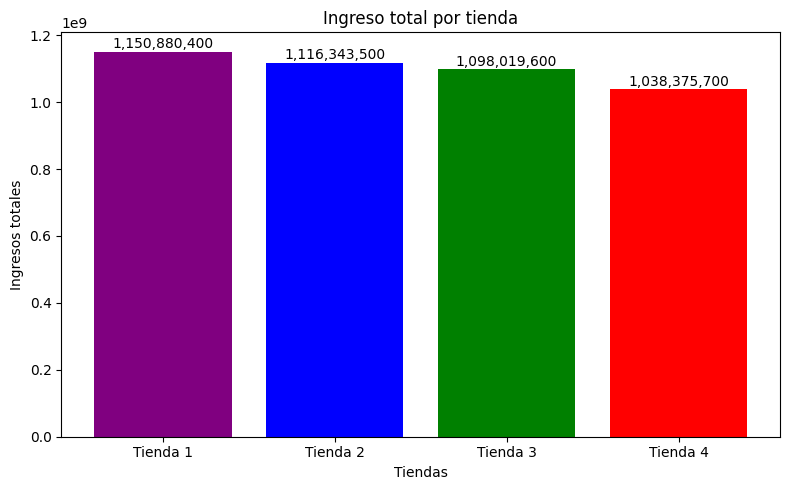

In [25]:
import matplotlib.pyplot as plt

colores = ['purple', 'blue', 'green', 'red']
tiendas = ingresoTiendas["Tienda"]
ingresos = ingresoTiendas["Ingreso total"]

plt.figure(figsize=(8, 5))
plt.bar(tiendas, ingresos, color=colores)
plt.xlabel('Tiendas')
plt.ylabel('Ingresos totales')
plt.title('Ingreso total por tienda')

# Mostrar valores arriba de cada barra
for i, valor in enumerate(ingresos):
    plt.text(i, valor + valor*0.01, f'{valor:,.0f}', ha='center', fontsize=10)

plt.tight_layout()
plt.show()


## Facturación de cada tienda por año

In [26]:
ingresosTienda1Ano = tienda1.groupby(tienda1['Fecha de Compra'].dt.year)['Precio'].sum()
ingresosTienda2Ano = tienda2.groupby(tienda2['Fecha de Compra'].dt.year)['Precio'].sum()
ingresosTienda3Ano = tienda3.groupby(tienda3['Fecha de Compra'].dt.year)['Precio'].sum()
ingresosTienda4Ano = tienda4.groupby(tienda4['Fecha de Compra'].dt.year)['Precio'].sum()
ingresosAno = pd.DataFrame({
    'Tienda 1': ingresosTienda1Ano,
    'Tienda 2': ingresosTienda2Ano,
    'Tienda 3': ingresosTienda3Ano,
    'Tienda 4': ingresosTienda4Ano
})
ingresosAno.head()

,Tienda 1,Tienda 2,Tienda 3,Tienda 4
Fecha de Compra,,,,
2020,"368,933,200","320,466,600","321,707,500","330,847,700"
2021,"362,120,800","351,215,500","362,954,400","347,823,600"
2022,"316,565,600","358,226,500","350,438,300","302,221,500"
2023,"103,260,800","86,434,900","62,919,400","57,482,900"


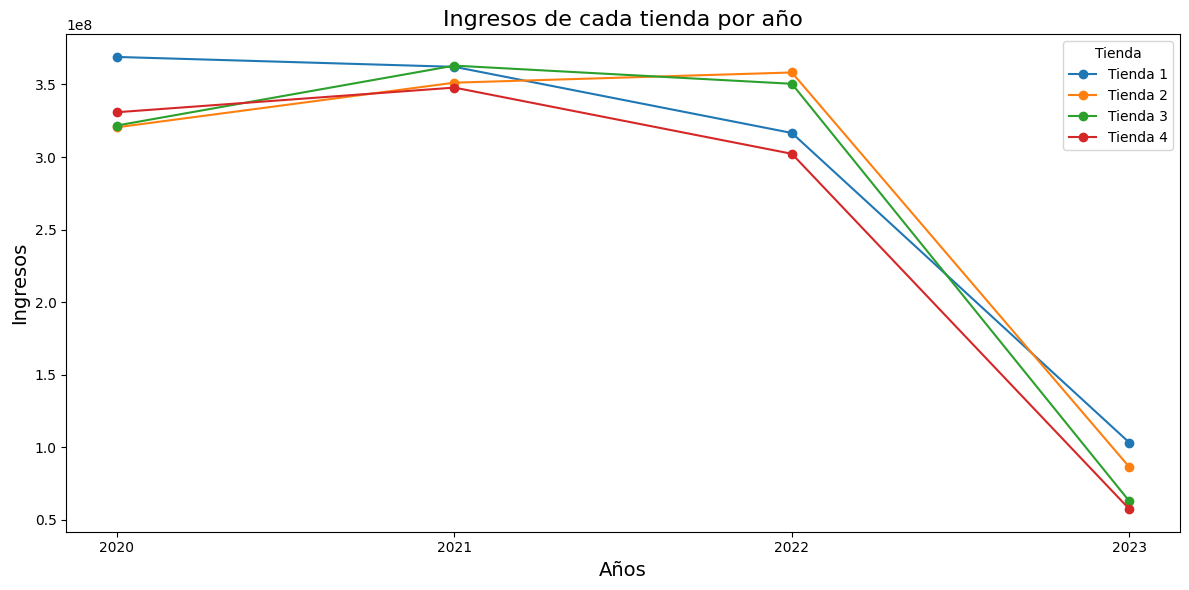

In [27]:
anos = ingresosAno.index.tolist()
tienda1ingresos = ingresosAno['Tienda 1'].tolist()
tienda2ingresos = ingresosAno['Tienda 2'].tolist()
tienda3ingresos = ingresosAno['Tienda 3'].tolist()
tienda4ingresos = ingresosAno['Tienda 4'].tolist()

# Crear la gráfica
plt.figure(figsize=(12, 6))

# Dibujar líneas para cada tienda
plt.plot(anos, tienda1ingresos, marker='o', label='Tienda 1')
plt.plot(anos, tienda2ingresos, marker='o', label='Tienda 2')
plt.plot(anos, tienda3ingresos, marker='o', label='Tienda 3')
plt.plot(anos, tienda4ingresos, marker='o', label='Tienda 4')

# Configurar etiquetas
plt.xlabel('Años', fontsize=14)
plt.ylabel('Ingresos', fontsize=14)
plt.title('Ingresos de cada tienda por año', fontsize=16)
plt.legend(title='Tienda')

# Ajustar diseño
plt.xticks(ticks=anos)
plt.tight_layout()
plt.show()


In [28]:
tienda1OrdenPorFecha = tienda1.sort_values(by='Fecha de Compra', ascending=False)
tienda2OrdenPorFecha = tienda2.sort_values(by='Fecha de Compra', ascending=False)
tienda3OrdenPorFecha = tienda3.sort_values(by='Fecha de Compra', ascending=False)
tienda4OrdenPorFecha = tienda4.sort_values(by='Fecha de Compra', ascending=False)
tienda1OrdenPorFecha.head()

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
67,Modelado predictivo,Libros,"53,000","1,000",2023-03-31,Izabela de León,Cali,3,Tarjeta de crédito,3,3,-77
1067,Cama king,Muebles,"630,300","33,800",2023-03-31,Mariana Herrera,Medellín,1,Cupón,1,6,-76
382,Mesa de comedor,Muebles,"228,400","20,000",2023-03-31,Felipe Santos,Bogotá,3,Nequi,1,5,-74
1928,Cama box,Muebles,"561,500","28,100",2023-03-30,Pedro Gomez,Bogotá,5,Tarjeta de crédito,10,5,-74
1322,Iphone 15,Electrónicos,"1,969,900","103,100",2023-03-30,Camila Rivera,Bogotá,3,Tarjeta de crédito,1,5,-74


In [29]:
tienda2OrdenPorFecha.head()

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
443,Pandereta,Instrumentos musicales,"94,000","7,400",2023-03-31,Ángel Rodriguez,Medellín,2,Tarjeta de crédito,10,6,-76
1096,Lavavajillas,Electrodomésticos,"1,161,700","62,200",2023-03-30,Camila Rivera,Bogotá,5,Cupón,1,5,-74
2079,Impresora,Electrónicos,"349,900","16,800",2023-03-29,Juan Fernandez,Cali,5,Tarjeta de crédito,1,3,-77
20,Set de vasos,Artículos para el hogar,"43,600",0,2023-03-29,Maria Alfonso,Cali,1,Nequi,1,3,-77
1776,Celular ABXY,Electrónicos,"986,600","50,700",2023-03-28,Beatriz Morales,Bogotá,4,Tarjeta de crédito,2,5,-74


In [30]:
tienda3OrdenPorFecha.head()

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
2018,Mesa de noche,Muebles,"292,500","16,200",2023-03-31,Mariana Herrera,Bogotá,5,Tarjeta de crédito,1,5,-74
701,Dinosaurio Rex,Juguetes,"15,800","1,200",2023-03-30,Mariana Herrera,Medellín,5,Tarjeta de crédito,2,6,-76
1665,Smartwatch,Electrónicos,"181,000","7,800",2023-03-30,Santiago Silva,Cali,2,Tarjeta de crédito,1,3,-77
1262,Mesa de noche,Muebles,"269,200","15,600",2023-03-30,Pedro Gomez,Cali,4,Tarjeta de crédito,1,3,-77
565,Balón de baloncesto,Deportes y diversión,"29,900","2,300",2023-03-30,Beatriz Morales,Medellín,5,Nequi,1,6,-76


In [31]:
tienda4OrdenPorFecha.head()

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
1639,Vaso térmico,Deportes y diversión,"26,800",0,2023-03-30,Santiago Silva,Cali,5,Tarjeta de crédito,1,3,-77
1746,Asistente virtual,Electrónicos,"255,200","14,300",2023-03-29,Ángel Rodriguez,Medellín,5,Tarjeta de crédito,2,6,-76
265,Sillón,Muebles,"256,900","11,900",2023-03-29,Rafael Acosta,Pereira,3,Nequi,1,5,-76
1177,Armario,Muebles,"491,900","26,600",2023-03-27,Blanca Ramirez,Bogotá,5,Tarjeta de crédito,7,5,-74
2172,Kit de bancas,Muebles,"272,300","12,700",2023-03-27,Pedro Gomez,Medellín,5,Nequi,1,6,-76


# 2. Ventas por categoría

In [32]:
conteoCategoriaT1 = tienda1['Categoría del Producto'].value_counts()
conteoCategoriaT2 = tienda2['Categoría del Producto'].value_counts()
conteoCategoriaT3 = tienda3['Categoría del Producto'].value_counts()
conteoCategoriaT4 = tienda4['Categoría del Producto'].value_counts()
conteosCategorias = pd.DataFrame({
    'Tienda 1': conteoCategoriaT1,
    'Tienda 2': conteoCategoriaT2,
    'Tienda 3': conteoCategoriaT3,
    'Tienda 4': conteoCategoriaT4
})
conteosCategorias = conteosCategorias.fillna(0)
# Sumar los conteos de todas las tiendas
conteosCategorias['Total'] = conteosCategorias.sum(axis=1)

# Ordenar por 'Total' de mayor a menor
conteosOrdenado = conteosCategorias.sort_values(by='Total', ascending=False)

# Seleccionar las 5 categorías con más cantidad
top = conteosOrdenado.head(5)

top.head()

,Tienda 1,Tienda 2,Tienda 3,Tienda 4,Total
Categoría del Producto,,,,,
Muebles,465,442,499,480,1886
Electrónicos,448,422,451,451,1772
Juguetes,324,313,315,338,1290
Electrodomésticos,312,305,278,254,1149
Deportes y diversión,284,275,277,277,1113


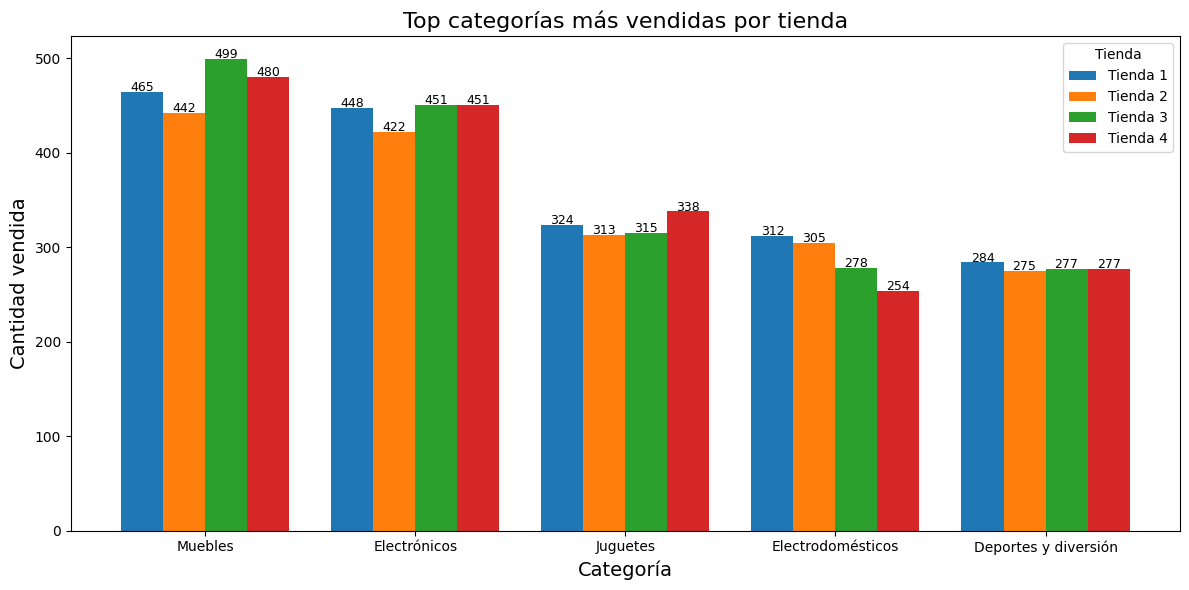

In [33]:
categorias = top.index.tolist()  # ['Muebles', 'Electrónicos', 'Juguetes']
tienda1Top = top['Tienda 1'].tolist()
tienda2Top = top['Tienda 2'].tolist()
tienda3Top = top['Tienda 3'].tolist()
tienda4Top = top['Tienda 4'].tolist()
# Número de categorías
n_categorias = len(categorias)
indice = np.arange(n_categorias)  # posiciones: 0, 1, 2
ancho = 0.2  # Ancho de cada barra

# Crear la gráfica
plt.figure(figsize=(12,6))

# Dibujar una barra para cada tienda
plt.bar(indice - 1.5*ancho, tienda1Top, width=ancho, label='Tienda 1')
plt.bar(indice - 0.5*ancho, tienda2Top, width=ancho, label='Tienda 2')
plt.bar(indice + 0.5*ancho, tienda3Top, width=ancho, label='Tienda 3')
plt.bar(indice + 1.5*ancho, tienda4Top, width=ancho, label='Tienda 4')

# Configurar etiquetas
plt.xlabel('Categoría', fontsize=14)
plt.ylabel('Cantidad vendida', fontsize=14)
plt.title('Top categorías más vendidas por tienda', fontsize=16)
plt.xticks(indice, categorias)  # Poner las categorías en el eje X
plt.legend(title='Tienda')

# Mostrar valores arriba de cada barra
for i in range(n_categorias):
    plt.text(indice[i] - 1.5*ancho, tienda1Top[i] + 1, str(int(tienda1Top[i])), ha='center', fontsize=9)
    plt.text(indice[i] - 0.5*ancho, tienda2Top[i] + 1, str(int(tienda2Top[i])), ha='center', fontsize=9)
    plt.text(indice[i] + 0.5*ancho, tienda3Top[i] + 1, str(int(tienda3Top[i])), ha='center', fontsize=9)
    plt.text(indice[i] + 1.5*ancho, tienda4Top[i] + 1, str(int(tienda4Top[i])), ha='center', fontsize=9)

# Ajustar diseño
plt.tight_layout()
plt.show()

### Ventas por categoría con valor monetario

In [34]:
# Paso 1: Obtener las categorías top (ya ordenadas por cantidad vendida)
categorias_top = top.index

# Paso 2: Filtrar los dataframes por esas categorías
ventasT1 = tienda1[tienda1['Categoría del Producto'].isin(categorias_top)]
ventasT2 = tienda2[tienda2['Categoría del Producto'].isin(categorias_top)]
ventasT3 = tienda3[tienda3['Categoría del Producto'].isin(categorias_top)]
ventasT4 = tienda4[tienda4['Categoría del Producto'].isin(categorias_top)]

# Paso 3: Agrupar por categoría y sumar los valores vendidos
valorT1 = ventasT1.groupby('Categoría del Producto')['Precio'].sum()
valorT2 = ventasT2.groupby('Categoría del Producto')['Precio'].sum()
valorT3 = ventasT3.groupby('Categoría del Producto')['Precio'].sum()
valorT4 = ventasT4.groupby('Categoría del Producto')['Precio'].sum()

# Paso 4: Crear DataFrame con el valor total por tienda y categoría
valores_top_categorias = pd.DataFrame({
    'Tienda 1': valorT1,
    'Tienda 2': valorT2,
    'Tienda 3': valorT3,
    'Tienda 4': valorT4
}).fillna(0)

# Agregar columna con total general por categoría
valores_top_categorias['Total'] = valores_top_categorias.sum(axis=1)

# Mostrar resultados
valores_top_categorias = valores_top_categorias.loc[top.index]

# Mostrar resultados ordenados igual que la tabla de cantidades
valores_top_categorias.head()

,Tienda 1,Tienda 2,Tienda 3,Tienda 4,Total
Categoría del Producto,,,,,
Muebles,"187,633,700","176,426,300","201,072,100","192,528,900","757,661,000"
Electrónicos,"429,493,500","410,831,100","410,775,800","409,476,100","1,660,576,500"
Juguetes,"17,995,700","15,945,400","19,401,100","20,262,200","73,604,400"
Electrodomésticos,"363,685,200","348,567,800","329,237,900","283,260,200","1,324,751,100"
Deportes y diversión,"39,290,000","34,744,500","35,593,100","33,350,100","142,977,700"


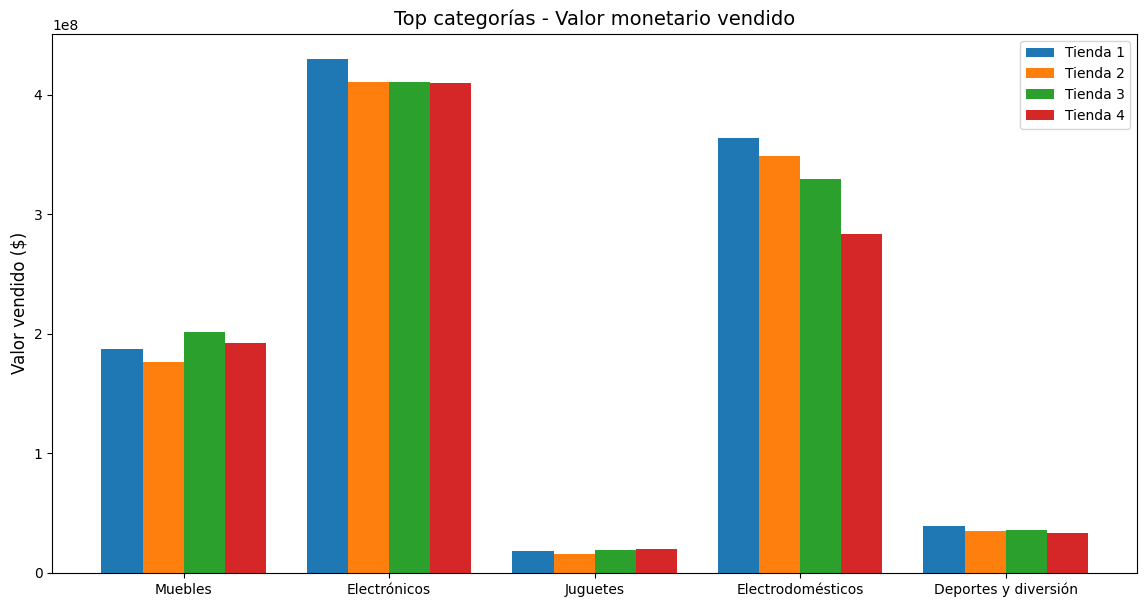

In [35]:
# Datos de cantidad
categorias = top.index.tolist()
tienda1Top = top['Tienda 1'].tolist()
tienda2Top = top['Tienda 2'].tolist()
tienda3Top = top['Tienda 3'].tolist()
tienda4Top = top['Tienda 4'].tolist()

# Datos de valor
valor1Top = valores_top_categorias['Tienda 1'].tolist()
valor2Top = valores_top_categorias['Tienda 2'].tolist()
valor3Top = valores_top_categorias['Tienda 3'].tolist()
valor4Top = valores_top_categorias['Tienda 4'].tolist()

n_categorias = len(categorias)
indice = np.arange(n_categorias)
ancho = 0.2

plt.figure(figsize=(14,7))
plt.bar(indice - 1.5*ancho, valor1Top, width=ancho, label='Tienda 1')
plt.bar(indice - 0.5*ancho, valor2Top, width=ancho, label='Tienda 2')
plt.bar(indice + 0.5*ancho, valor3Top, width=ancho, label='Tienda 3')
plt.bar(indice + 1.5*ancho, valor4Top, width=ancho, label='Tienda 4')
plt.ylabel('Valor vendido ($)', fontsize=12)
plt.title('Top categorías - Valor monetario vendido', fontsize=14)
plt.xticks(indice, categorias)
plt.legend()
plt.show()


# 3. Calificación promedio de la tienda


In [36]:
# Calcula el promedio de calificación por tienda
calificacionTienda1 = tienda1["Calificación"].mean()
calificacionTienda2 = tienda2["Calificación"].mean()
calificacionTienda3 = tienda3["Calificación"].mean()
calificacionTienda4 = tienda4["Calificación"].mean()

# Crear un DataFrame con las calificaciones promedio
calificacionTiendas = pd.DataFrame({
    "Tienda": ["Tienda 1", "Tienda 2", "Tienda 3", "Tienda 4"],
    "Calificacion Promedio": [calificacionTienda1, calificacionTienda2, calificacionTienda3, calificacionTienda4]
})

# Establecer el formato de visualización para los decimales
pd.set_option('display.float_format', '{:,.2f}'.format)

# Mostrar el DataFrame con las calificaciones promedio
calificacionTiendas.head()

,Tienda,Calificacion Promedio
0,Tienda 1,3.98
1,Tienda 2,4.04
2,Tienda 3,4.05
3,Tienda 4,4.00


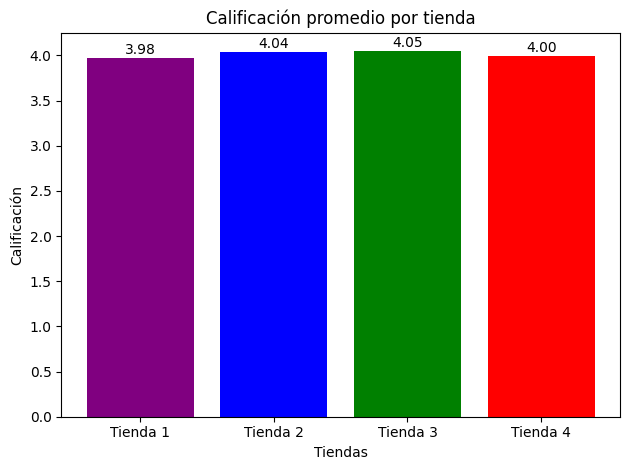

In [37]:
colores = ['purple', 'blue', 'green', 'red'] # Colores parea cada barra
calificacionPromedio = calificacionTiendas["Calificacion Promedio"]
plt.bar(calificacionTiendas["Tienda"],calificacionTiendas["Calificacion Promedio"], color = colores) # Creación de la grafica de barras y sele da un color distinto a cada barra
plt.xlabel('Tiendas')  # Etiquetamos el eje x
plt.ylabel('Calificación')  # Etiquetamos el eje y
plt.title('Calificación promedio por tienda')  # Añadimos un título al gráfico

# Mostrar valores sobre cada barra
for i, valor in enumerate(calificacionPromedio):
    plt.text(i, valor + valor*0.01, f'{valor:,.2f}', ha='center', fontsize=10)

plt.tight_layout()
plt.show()


### Calificación de cada tienda por año

In [38]:
calificacionTienda1Ano = tienda1.groupby(tienda1['Fecha de Compra'].dt.year)['Calificación'].mean()
calificacionTienda2Ano = tienda2.groupby(tienda2['Fecha de Compra'].dt.year)['Calificación'].mean()
calificacionTienda3Ano = tienda3.groupby(tienda3['Fecha de Compra'].dt.year)['Calificación'].mean()
calificacionTienda4Ano = tienda4.groupby(tienda4['Fecha de Compra'].dt.year)['Calificación'].mean()
calificacionAno = pd.DataFrame({
    'Tienda 1': calificacionTienda1Ano,
    'Tienda 2': calificacionTienda2Ano,
    'Tienda 3': calificacionTienda3Ano,
    'Tienda 4': calificacionTienda4Ano
})
calificacionAno.head()

,Tienda 1,Tienda 2,Tienda 3,Tienda 4
Fecha de Compra,,,,
2020,3.93,4.04,4.12,4.02
2021,3.96,4.00,3.93,3.96
2022,4.04,4.10,4.09,3.97
2023,3.96,3.96,4.08,4.17


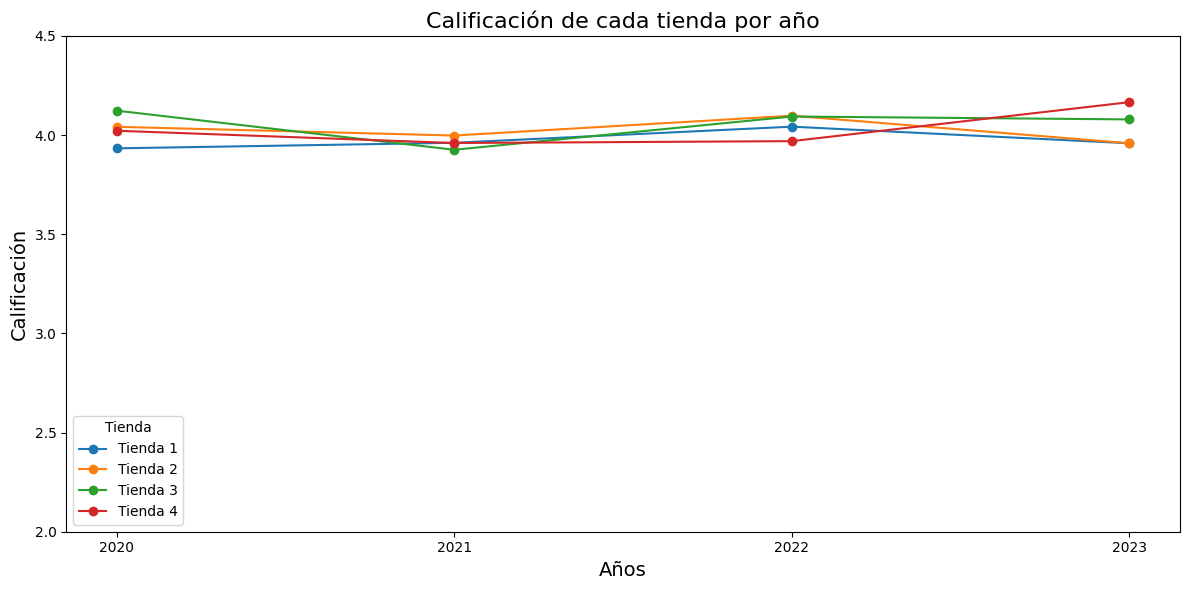

In [39]:
anos = calificacionAno.index.tolist()
tienda1calificacion = calificacionAno['Tienda 1'].tolist()
tienda2calificacion = calificacionAno['Tienda 2'].tolist()
tienda3calificacion = calificacionAno['Tienda 3'].tolist()
tienda4calificacion = calificacionAno['Tienda 4'].tolist()

# Crear la gráfica
plt.figure(figsize=(12, 6))
plt.ylim(2, 4.5)

# Dibujar líneas para cada tienda
plt.plot(anos, tienda1calificacion, marker='o', label='Tienda 1')
plt.plot(anos, tienda2calificacion, marker='o', label='Tienda 2')
plt.plot(anos, tienda3calificacion, marker='o', label='Tienda 3')
plt.plot(anos, tienda4calificacion, marker='o', label='Tienda 4')

# Configurar etiquetas
plt.xlabel('Años', fontsize=14)
plt.ylabel('Calificación', fontsize=14)
plt.title('Calificación de cada tienda por año', fontsize=16)
plt.legend(title='Tienda')

# Ajustar diseño
plt.xticks(ticks=anos)
plt.tight_layout()
plt.show()

# 4. Productos más y menos vendidos

In [40]:
# Contar el numero por producto
conteoProductosT1 = tienda1['Producto'].value_counts()
conteoProductosT2 = tienda2['Producto'].value_counts()
conteoProductosT3 = tienda3['Producto'].value_counts()
conteoProductosT4 = tienda4['Producto'].value_counts()
# Lista de conteos y nombres de tiendas
conteos = [conteoProductosT1, conteoProductosT2, conteoProductosT3, conteoProductosT4]
tiendas = ['Tienda 1', 'Tienda 2', 'Tienda 3', 'Tienda 4']

# Para almacenar los datos
topVentas = []

# Recorrer cada tienda
for tienda, conteo in zip(tiendas, conteos):
    # Top 3 más vendidos
    topMas = conteo.nlargest(3)
    # Top 3 menos vendidos
    topMenos = conteo.nsmallest(3)
    for producto, ventas in topMas.items():
        topVentas.append({'Tienda': tienda, 'Producto': producto, 'Ventas': ventas})
    for producto, ventas in topMenos.items():
        topVentas.append({'Tienda': tienda, 'Producto': producto, 'Ventas': ventas})

# Crear los DataFrames
dfTopVentas = pd.DataFrame(topVentas)
dfTopVentas = dfTopVentas.sort_values(by=['Tienda', 'Ventas'], ascending=[True,False])
dfTopVentas.reset_index(drop=True, inplace=True)

# Mostrar resultados
print("Top 3 productos más vendidos por tienda:")
print(dfTopVentas)


Top 3 productos más vendidos por tienda:
      Tienda                   Producto  Ventas
0   Tienda 1                 Microondas      60
1   Tienda 1              TV LED UHD 4K      60
2   Tienda 1                    Armario      60
3   Tienda 1            Olla de presión      35
4   Tienda 1  Auriculares con micrófono      33
5   Tienda 1               Celular ABXY      33
6   Tienda 2  Iniciando en programación      65
7   Tienda 2                 Microondas      62
8   Tienda 2                    Batería      61
9   Tienda 2            Mesa de comedor      34
10  Tienda 2                  Impresora      34
11  Tienda 2              Juego de mesa      32
12  Tienda 3              Kit de bancas      57
13  Tienda 3            Mesa de comedor      56
14  Tienda 3                  Cama king      56
15  Tienda 3               Set de vasos      36
16  Tienda 3                    Mochila      36
17  Tienda 3    Bloques de construcción      35
18  Tienda 4                   Cama box      62

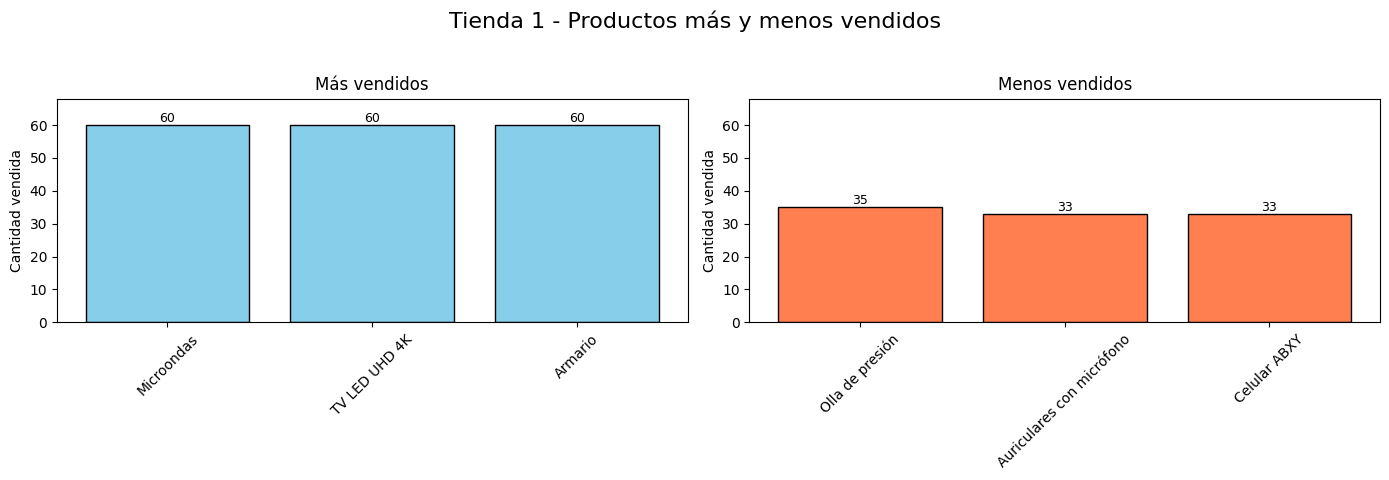

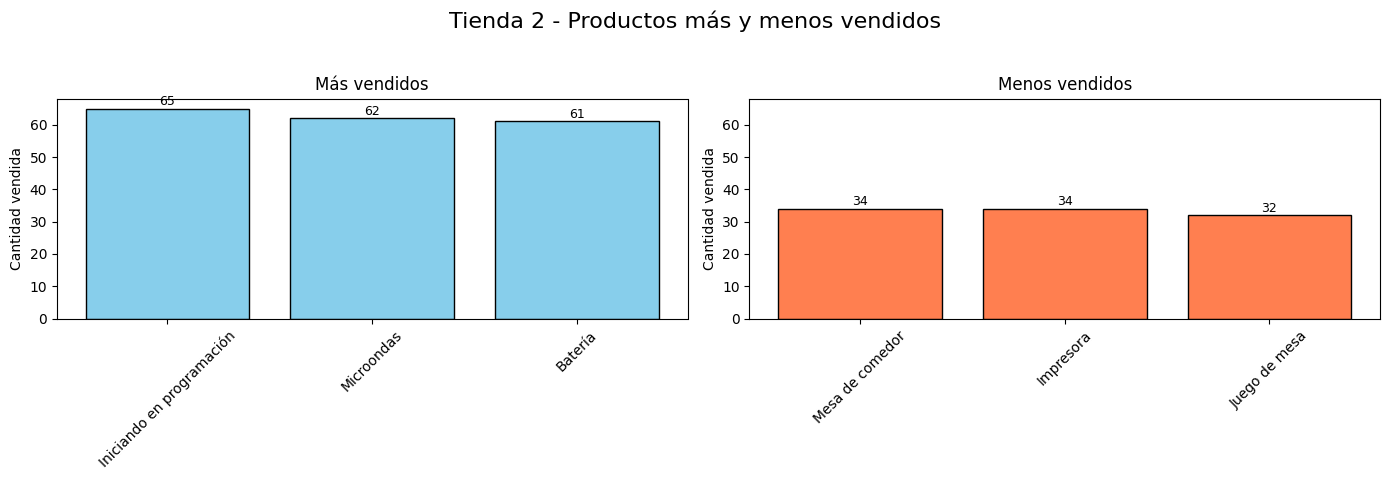

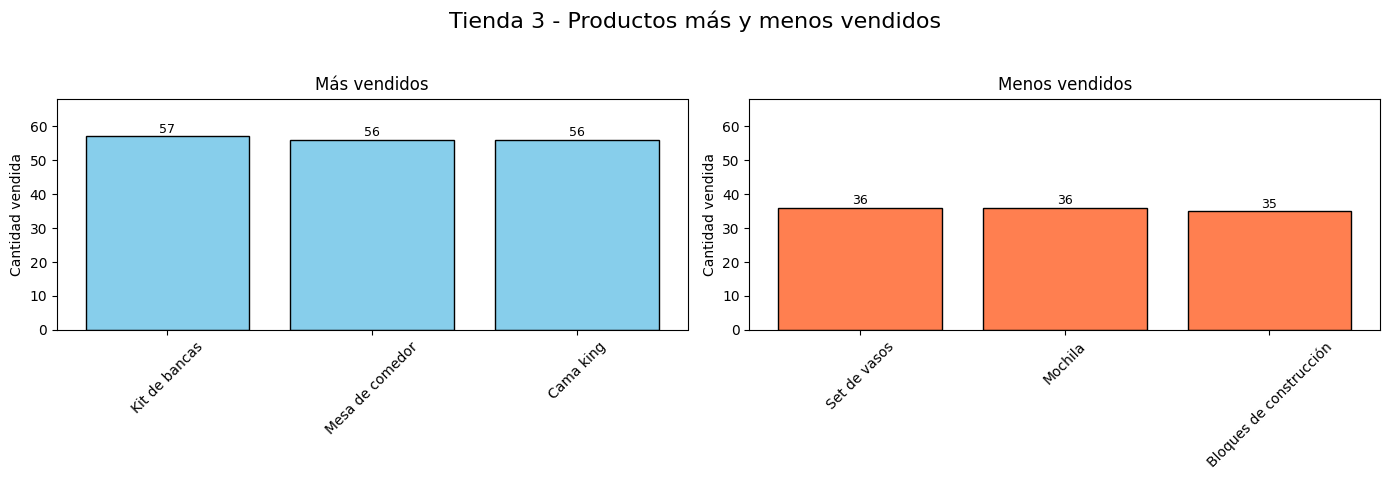

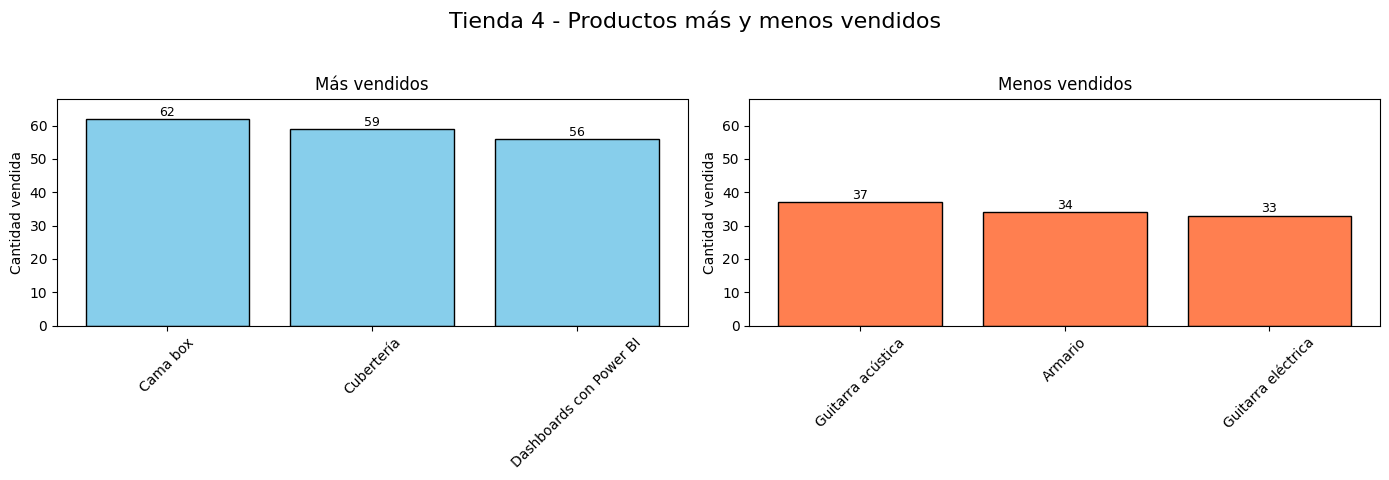

In [41]:
# Agrupar por tienda
tiendas_unicas = dfTopVentas['Tienda'].unique()

for tienda in tiendas_unicas:
    df_tienda = dfTopVentas[dfTopVentas['Tienda'] == tienda].reset_index(drop=True)
    
    # Separar más y menos vendidos (primeros 3 son más vendidos)
    df_mas = df_tienda.iloc[:3]
    df_menos = df_tienda.iloc[3:]

    categorias_mas = df_mas['Producto']
    ventas_mas = df_mas['Ventas']

    categorias_menos = df_menos['Producto']
    ventas_menos = df_menos['Ventas']

    # Crear figura con 2 subgráficas
    fig, axs = plt.subplots(1, 2, figsize=(14, 5))
    fig.suptitle(f'{tienda} - Productos más y menos vendidos', fontsize=16)

    # Definir límites comunes para el eje Y
    limite_y = 68

    # Más vendidos
    axs[0].bar(categorias_mas, ventas_mas, color='skyblue', edgecolor='black')
    axs[0].set_title('Más vendidos')
    axs[0].set_ylabel('Cantidad vendida')
    axs[0].set_ylim(0, limite_y)
    axs[0].tick_params(axis='x', rotation=45)  # Rotar etiquetas sin advertencia
    for i, v in enumerate(ventas_mas):
        axs[0].text(i, v + 1, str(v), ha='center', fontsize=9)

    # Menos vendidos
    axs[1].bar(categorias_menos, ventas_menos, color='Coral', edgecolor='black')
    axs[1].set_title('Menos vendidos')
    axs[1].set_ylabel('Cantidad vendida')
    axs[1].set_ylim(0, limite_y)
    axs[1].tick_params(axis='x', rotation=45)
    for i, v in enumerate(ventas_menos):
        axs[1].text(i, v + 1, str(v), ha='center', fontsize=9)

    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()


# 5. Envío promedio por tienda

In [42]:
envioTienda1 = tienda1["Costo de envío"].mean()
envioTienda2 = tienda2["Costo de envío"].mean()
envioTienda3 = tienda3["Costo de envío"].mean()
envioTienda4 = tienda4["Costo de envío"].mean()

# Crear un DataFrame con las calificaciones promedio
envioTiendas = pd.DataFrame({
    "Tienda": ["Tienda 1", "Tienda 2", "Tienda 3", "Tienda 4"],
    "Costo de envio promedio": [envioTienda1, envioTienda2, envioTienda3, envioTienda4]
})

# Mostrar el DataFrame con las calificaciones promedio
envioTiendas.head()

,Tienda,Costo de envio promedio
0,Tienda 1,"26,018.61"
1,Tienda 2,"25,216.24"
2,Tienda 3,"24,805.68"
3,Tienda 4,"23,459.46"


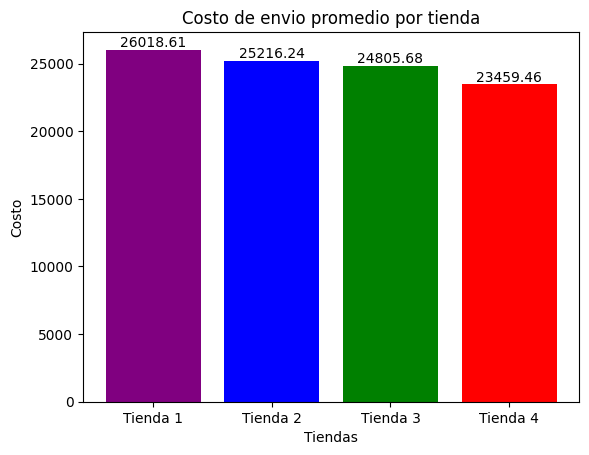

In [43]:
colores = ['purple', 'blue', 'green', 'red'] # Colores parea cada barra
plt.bar(envioTiendas["Tienda"],envioTiendas["Costo de envio promedio"], color = colores) # Creación de la grafica de barras y sele da un color distinto a cada barra
plt.xlabel('Tiendas')  # Etiquetamos el eje x
plt.ylabel('Costo')  # Etiquetamos el eje y
plt.title('Costo de envio promedio por tienda')  # Añadimos un título al gráfico
for i, valor in enumerate(envioTiendas["Costo de envio promedio"]):
    plt.text(i, valor + 0.5, f'{valor:.2f}', ha='center', va='bottom')
plt.show()

# Informe de resultados

## Análisis de facturación

Teniendo en cuenta el primer criterio sobre la cantidad de ingresos totales, la decicion es vender la **tineda 4**, ya que la cantidad de ingresos es menor con respecto a las demas tiendas.

## Análisis de facturación por año proyectando a futuro

Al observar las ganancias por año (2020 a 2022, pues 2023 apenas se ven 3 meses del año, con lo cual no hay suficientes datos para este año) las ventas de esta tienda van en caida, con respecto a años anteriores. Aunque inicio como la tienda con mayores ventas, para 2023 es la tercera en cuanto a ingresos con muy poco margen de ganancia conparado a la tienda 4. Esto presenta una gran caida en ingresos respecto a las demas tiendas. Por lo que, si consideras una proyeccion de ingresos a futuro, la **tienda 1** seria la mejor opcion a vender.  

## Ventas por categoría

Considerando las categorias mas vendidas, se puede observar que las mas evndias son:
1. muebles
2. Electronicos
3. Juguetes
4. Electrodomésticos
5. Deportes y diversión

## Cantidad de ventas por categoría
Tomando en cuenta la cantidad de productos vendidos, la opcion a vender seria la **tienda 2**, ya que en 4 de las 5 categorias tiene las ventas mas bajas.
## Cantidad monetaria por categoría  
Por otro lado al contabilizar la cantidad de dinero obtenido en estas categorias, las tienda 2 pasa a tener solo 2 de las ventas más bajas por categoria. Mientras que la **tienda 4** sube de 1 a 3 de las categorias con peores ventas con respecto a las demas tiendas.

## Calificación promedio de la tienda

En cuanto a la calificación dada por los clientes a las tiendas, tenemos que la tienda 1 es la peor evaluada de las 4 tiendas, aunque la calificacion entre cada tienda varia muy poco con solo 0.07 entre la mayor y menor tienda calificada. Además de que todas las tiendas muestran una constante subida y bajada en la calificaión obtenida.  
Sin embargo podemos ver que la calificacion de la tienda 4 va en asenso mientras que la tienda 1 sube y baja constantemente, teniendo 2 de los peores resultados respecto a la valoracion de las tiendas.  
Por lo cual en esta categoria la **tienda 1** es la peor evaluada.

## Costo de envío promedio por tienda

En esta categoria podemos ver que la **tienda 1** tiene un promedio de costo de envio más alto con respecto a las de mas tiendas, haciendola la por opcion en esta categoria.

## Decisión Final

La tienda que se tiene la peor valoracion y debe de ser vendida es la **tienda 1**, debido a que pierde en 3 de 6 categorias (Análisis de facturación por año proyectando a futuro, calificación promedio de la tienda y costo de envío promedio por tienda). mientras que la siguiente tienda con peor evaluacion es la tienda 4 con 2 de 6 categorias peor evaluadas.
